Import Libraries

In [1]:
# Filtering Warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Collection

In [2]:
import requests
from bs4 import BeautifulSoup
import csv

# Base URL with a placeholder for the page number
base_url = "https://www.airlinequality.com/airline-reviews/british-airways/page/{}/?sortby=post_date%3ADesc&pagesize=100"

# List to hold all reviews data
reviews_data = []

# Initialize a global serial number
serial_no = 1

# Function to fetch data from a specific page
def fetch_page(page_number):
    global serial_no  # Use the global serial number variable
    url = base_url.format(page_number)
    response = requests.get(url)

    # Check if the request was successful
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')

        # Find all review articles on the page
        review_articles = soup.find_all('article', class_='comp_media-review-rated')

        # Loop through each review article and extract the details
        for article in review_articles:
            review = {}
            review['Serial_No'] = serial_no
            
            # Scraping the "Trip Verified" status
            trip_verified = article.find('em').text.strip() if article.find('em') else None
            review['Trip_Verified'] = trip_verified

            # Scraping the feedback text and cleaning it
            feedback_text = article.find('div', itemprop="reviewBody").text.strip()
            feedback_text = feedback_text.replace(trip_verified, '').strip() if trip_verified else feedback_text
            feedback_text = feedback_text.lstrip('|').strip()
            review['Feedback'] = feedback_text
            
            review['Overall_Rating'] = article.find('div', class_='rating-10').find('span', itemprop='ratingValue').text.strip() if article.find('div', class_='rating-10') else None
            review['Date'] = article.find('meta', itemprop='datePublished')['content'] if article.find('meta', itemprop='datePublished') else None
            review['Type_of_Traveller'] = article.find('td', class_='review-rating-header type_of_traveller').find_next('td').text.strip() if article.find('td', class_='review-rating-header type_of_traveller') else None
            review['Seat_Type'] = article.find('td', class_='review-rating-header cabin_flown').find_next('td').text.strip() if article.find('td', class_='review-rating-header cabin_flown') else None
            review['Seat_Comfort'] = len(article.find('td', class_='review-rating-header seat_comfort').find_next('td').find_all('span', class_='star fill')) if article.find('td', class_='review-rating-header seat_comfort') else None
            review['Cabin_Staff_Service'] = len(article.find('td', class_='review-rating-header cabin_staff_service').find_next('td').find_all('span', class_='star fill')) if article.find('td', class_='review-rating-header cabin_staff_service') else None
            review['Ground_Service'] = len(article.find('td', class_='review-rating-header ground_service').find_next('td').find_all('span', class_='star fill')) if article.find('td', class_='review-rating-header ground_service') else None
            review['Wifi_Connectivity'] = len(article.find('td', class_='review-rating-header wifi_and_connectivity').find_next('td').find_all('span', class_='star fill')) if article.find('td', class_='review-rating-header wifi_and_connectivity') else None
            review['Food_and_Beverages'] = len(article.find('td', class_='review-rating-header food_and_beverages').find_next('td').find_all('span', class_='star fill')) if article.find('td', class_='review-rating-header food_and_beverages') else None
            review['Inflight_Entertainment'] = len(article.find('td', class_='review-rating-header inflight_entertainment').find_next('td').find_all('span', class_='star fill')) if article.find('td', class_='review-rating-header inflight_entertainment') else None
            review['Value_For_Money'] = len(article.find('td', class_='review-rating-header value_for_money').find_next('td').find_all('span', class_='star fill')) if article.find('td', class_='review-rating-header value_for_money') else None
            review['Recommended'] = article.find('td', class_='review-rating-header recommended').find_next('td').text.strip() if article.find('td', class_='review-rating-header recommended') else None

            # Add the review dictionary to the list
            reviews_data.append(review)
            serial_no += 1  # Increment the serial number for the next review

    else:
        print(f"Failed to retrieve page {page_number}")

# Loop to fetch data from pages 1 to 32
for page in range(1, 33):
    print(f"Fetching page {page}...")
    fetch_page(page)

# Save all reviews data to a CSV file
if reviews_data:
    keys = reviews_data[0].keys()
    with open('british_airways_reviews.csv', 'w', newline='', encoding='utf-8') as output_file:
        dict_writer = csv.DictWriter(output_file, fieldnames=keys)
        dict_writer.writeheader()
        dict_writer.writerows(reviews_data)
    print(f"Saved {len(reviews_data)} reviews to 'british_airways_reviews.csv'.")
else:
    print("No data to save.")

Fetching page 1...
Fetching page 2...
Fetching page 3...
Fetching page 4...
Fetching page 5...
Fetching page 6...
Fetching page 7...
Fetching page 8...
Fetching page 9...
Fetching page 10...
Fetching page 11...
Fetching page 12...
Fetching page 13...
Fetching page 14...
Fetching page 15...
Fetching page 16...
Fetching page 17...
Fetching page 18...
Fetching page 19...
Fetching page 20...
Fetching page 21...
Fetching page 22...
Fetching page 23...
Fetching page 24...
Fetching page 25...
Fetching page 26...
Fetching page 27...
Fetching page 28...
Fetching page 29...
Fetching page 30...
Fetching page 31...
Fetching page 32...
Saved 3200 reviews to 'british_airways_reviews.csv'.


In [3]:
print(reviews_data[0])

{'Serial_No': 1, 'Trip_Verified': 'Trip Verified', 'Feedback': '✅  |\xa0 \xa0Could not book online the night before because the system was down. Arrived early at airport to check in, to find our premium economy seats were downgraded to economy. What’s worse, the split my family so I, my wife, and autistic son sat separately. If I could give minus stars, I would. Shambles of an airline', 'Overall_Rating': '1', 'Date': '2025-04-18', 'Type_of_Traveller': 'Family Leisure', 'Seat_Type': 'Economy Class', 'Seat_Comfort': 1, 'Cabin_Staff_Service': 1, 'Ground_Service': 1, 'Wifi_Connectivity': 1, 'Food_and_Beverages': 1, 'Inflight_Entertainment': 1, 'Value_For_Money': 1, 'Recommended': 'no'}


In [4]:
df = pd.read_csv("british_airways_reviews.csv")
df.head()

,Serial_No,Trip_Verified,Feedback,Overall_Rating,Date,Type_of_Traveller,Seat_Type,Seat_Comfort,Cabin_Staff_Service,Ground_Service,Wifi_Connectivity,Food_and_Beverages,Inflight_Entertainment,Value_For_Money,Recommended
0,1,Trip Verified,✅ | Could not book online the night before ...,1,2025-04-18,Family Leisure,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,1,no
1,2,Trip Verified,✅ | Having had some rough experiences with BA...,7,2025-04-16,Solo Leisure,Economy Class,4.0,5.0,3.0,1.0,3.0,4.0,4,yes
2,3,Trip Verified,✅ | This comfortable flight was BA at its b...,9,2025-04-16,Solo Leisure,First Class,5.0,5.0,5.0,NaN,5.0,NaN,4,yes
3,4,Trip Verified,✅ | Punta Cana Terminal B check in was stra...,9,2025-04-15,Couple Leisure,Business Class,4.0,5.0,4.0,NaN,4.0,3.0,4,yes
4,5,Trip Verified,✅ | The employee at Venice Airport checkin ...,3,2025-04-13,Couple Leisure,Economy Class,5.0,5.0,1.0,NaN,NaN,NaN,3,no


In [5]:
df.shape

(3200, 15)

In [6]:
#null checking

(df.isnull().sum()/len(df)*100).sort_values(ascending = False)

Wifi_Connectivity         78.37500
Trip_Verified             49.40625
Inflight_Entertainment    39.00000
Food_and_Beverages        13.75000
Cabin_Staff_Service        4.40625
Seat_Comfort               3.93750
Ground_Service             3.65625
Type_of_Traveller          1.18750
Seat_Type                  0.06250
Serial_No                  0.00000
Feedback                   0.00000
Overall_Rating             0.00000
Date                       0.00000
Value_For_Money            0.00000
Recommended                0.00000
dtype: float64

In [7]:
df.duplicated().any()

False

In [8]:
target_counts = df['Recommended'].value_counts()
target_counts

Recommended
no     2056
yes    1144
Name: count, dtype: int64

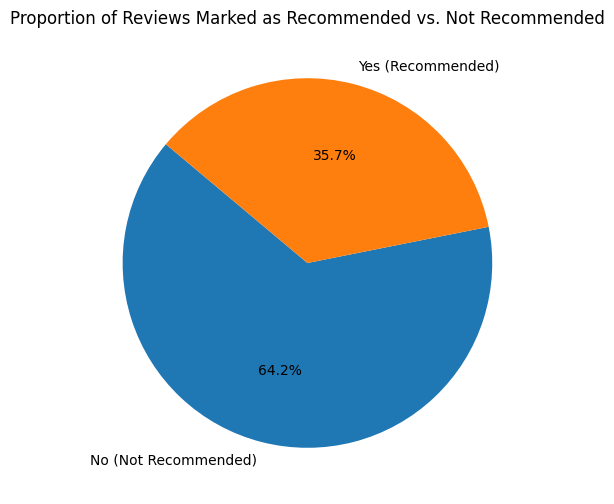

In [9]:
label_map = {'yes': 'Yes (Recommended)', 'no': 'No (Not Recommended)'}
custom_labels = [label_map[label] for label in target_counts.index]

plt.figure(figsize=(6, 6))
plt.pie(target_counts, labels=custom_labels, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Reviews Marked as Recommended vs. Not Recommended')
plt.show()

### Data Pre-processing

In [10]:
'''
Since null observations can be said to be not verified, we input 'Not Verified' for null values.
'''
df.loc[:, 'Trip_Verified'] = df['Trip_Verified'].fillna('Not Verified')

In [11]:
'''
we drop 'Wifi_Connectivity' column for having too many null values.
Also, we drop 'Date' column due to less relevance.
'''

df.drop(columns=["Wifi_Connectivity","Date"],inplace=True,axis=1)
df.shape

(3200, 13)

In [12]:
df.isnull().sum().sort_values(ascending = False)

Inflight_Entertainment    1248
Food_and_Beverages         440
Cabin_Staff_Service        141
Seat_Comfort               126
Ground_Service             117
Type_of_Traveller           38
Seat_Type                    2
Serial_No                    0
Trip_Verified                0
Feedback                     0
Overall_Rating               0
Value_For_Money              0
Recommended                  0
dtype: int64

In [13]:
df.dtypes

Serial_No                   int64
Trip_Verified              object
Feedback                   object
Overall_Rating              int64
Type_of_Traveller          object
Seat_Type                  object
Seat_Comfort              float64
Cabin_Staff_Service       float64
Ground_Service            float64
Food_and_Beverages        float64
Inflight_Entertainment    float64
Value_For_Money             int64
Recommended                object
dtype: object

In [14]:
'''
For numeric columns, we replace null values with 'mode'
'''
numeric_null_columns = ['Inflight_Entertainment', 'Food_and_Beverages', 'Ground_Service', 'Cabin_Staff_Service','Seat_Comfort']

df.Inflight_Entertainment.fillna(df.Inflight_Entertainment.mode()[0],inplace = True)
df.Food_and_Beverages.fillna(df.Food_and_Beverages.mode()[0],inplace = True)
df.Ground_Service.fillna(df.Ground_Service.mode()[0],inplace = True)
df.Cabin_Staff_Service.fillna(df.Cabin_Staff_Service.mode()[0],inplace = True)
df.Seat_Comfort.fillna(df.Seat_Comfort.mode()[0],inplace = True)

In [15]:
df['Type_of_Traveller'].value_counts(dropna=False)

Type_of_Traveller
Couple Leisure    1065
Solo Leisure       972
Business           682
Family Leisure     443
NaN                 38
Name: count, dtype: int64

In [16]:
df['Seat_Type'].value_counts(dropna=False)

Seat_Type
Economy Class      1726
Business Class      996
Premium Economy     307
First Class         169
NaN                   2
Name: count, dtype: int64

In [17]:
'''
We input 'Couple Leisure' for null values since it is the highest occuring 'Type_of_Traveller'.
We input 'Economy Class' for null values since it is the highest occuring 'Seat_Type
'''

df.Type_of_Traveller.fillna('Couple Leisure',inplace = True)
df.Seat_Type.fillna('Economy Class',inplace = True)

In [18]:
df.isnull().sum()

Serial_No                 0
Trip_Verified             0
Feedback                  0
Overall_Rating            0
Type_of_Traveller         0
Seat_Type                 0
Seat_Comfort              0
Cabin_Staff_Service       0
Ground_Service            0
Food_and_Beverages        0
Inflight_Entertainment    0
Value_For_Money           0
Recommended               0
dtype: int64

In [19]:
data = df[["Serial_No","Trip_Verified","Feedback","Overall_Rating","Recommended"]]
data.head()

,Serial_No,Trip_Verified,Feedback,Overall_Rating,Recommended
0,1,Trip Verified,✅ | Could not book online the night before ...,1,no
1,2,Trip Verified,✅ | Having had some rough experiences with BA...,7,yes
2,3,Trip Verified,✅ | This comfortable flight was BA at its b...,9,yes
3,4,Trip Verified,✅ | Punta Cana Terminal B check in was stra...,9,yes
4,5,Trip Verified,✅ | The employee at Venice Airport checkin ...,3,no


Removing Stop Words

In [20]:
import re
import nltk
from nltk.corpus import stopwords
import emoji

# Download stopwords if you haven't already
nltk.download('stopwords')

# Define a function to clean the text
def clean(text):
    # Remove emojis from the text
    text = emoji.replace_emoji(text, replace='')  # Remove all emojis

    # Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    
    # Convert to lowercase
    text = text.lower()

    # Tokenize the text into words
    words = text.split()

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Join the cleaned words back into a single string
    cleaned_text = ' '.join(words)

    return cleaned_text

# Create a new column 'Cleaned Reviews' by applying the clean function
data['Cleaned Reviews'] = data['Feedback'].apply(clean)

[nltk_data] Downloading package stopwords to /Users/mac/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
pd.set_option('display.max_colwidth', None)
data.head()

,Serial_No,Trip_Verified,Feedback,Overall_Rating,Recommended,Cleaned Reviews
0,1,Trip Verified,"✅ | Could not book online the night before because the system was down. Arrived early at airport to check in, to find our premium economy seats were downgraded to economy. What’s worse, the split my family so I, my wife, and autistic son sat separately. If I could give minus stars, I would. Shambles of an airline",1,no,could book online night system arrived early airport check find premium economy seats downgraded economy worse split family wife autistic son sat separately could give minus stars would shambles airline
1,2,Trip Verified,"✅ | Having had some rough experiences with BA in recent years, I did not look forward to this particular flight. However, it turned out to be a decent trip. The staff were really engaged and seemed to enjoy what they were doing. Food was acceptable, although there has to be other options than pasta or chicken on long-haul flights! Seating was good and the IFE worked well.",7,yes,rough experiences ba recent years look forward particular flight however turned decent trip staff really engaged seemed enjoy food acceptable although options pasta chicken long haul flights seating good ife worked well
2,3,Trip Verified,"✅ | This comfortable flight was BA at its best. Excellent start in the Chelsea Lounge with Krug behind the bar. Lounge hosts were welcoming and friendly, food not quite up to par but much better onboard. The First Suite is spacious and comfortable, and the two cabin crew were both experienced, friendly, professional and personable. They sprang to action quickly after takeoff, making beds or serving dinner as required. The menu was excellent with a well cooked beef fillet and delicious salmon starter. The new Nyetimber 1086 is an exceptionally good wine! Overall the service was well relaxed and intuitive. The cabin was comfortably cool and I left the flight feeling refreshed. BA have made some poor choices of late with their loyalty programme, but their staff still shine and they really got it right on this flight.",9,yes,comfortable flight ba best excellent start chelsea lounge krug behind bar lounge hosts welcoming friendly food quite par much better onboard first suite spacious comfortable two cabin crew experienced friendly professional personable sprang action quickly takeoff making beds serving dinner required menu excellent well cooked beef fillet delicious salmon starter new nyetimber exceptionally good wine overall service well relaxed intuitive cabin comfortably cool left flight feeling refreshed ba made poor choices late loyalty programme staff still shine really got right flight
3,4,Trip Verified,"✅ | Punta Cana Terminal B check in was straightforward with separate Club World desks. Agent was polite, issued boarding cards, provided a voucher for the VIP lounge and explained how to find it. No fast track security unless you paid $50 per passenger but that was the airport, not BA. VIP lounge was comfortable but not quiet due to 3 crying babies but that's life! Flight boarding was on time, we were group 2 and it was well managed by gate staff Old style club world seating but the cabin was clean, cabin crew were on hand and offered champagne or orange juice, there was a bottle of water in the drawer with the White Company amenity pack. White Company duvet was clean in a sealed bag. Order for drinks was taken before take off. Drinks were served promptly followed by dinner which we ordered immediately after take off. My starter of cream of leek soup was delicious served with warm bread. I declined the main course as it was late (choice was fillet steak or shrimp linguine). Dessert was chocolate mousse or cheese and biscuits however they found both for me as I didn't have the main. Excellent pinot noir from South Africa, refills were offered. Following dinner I got about 5 hours sleep and found the lay flat bed comfortable but I am pretty small. The duvet and pillow were great. Breakfast

Lemmatization

In [22]:
import spacy

# Load SpaCy model
nlp = spacy.load('en_core_web_sm')

def lemmatize_with_spacy(text):
    doc = nlp(text)
    lemmatized_text = ' '.join([token.lemma_ for token in doc if not token.is_stop])
    return lemmatized_text

# Apply the function to the 'Cleaned Reviews' column
data['Lemma'] = data['Cleaned Reviews'].apply(lemmatize_with_spacy)

In [23]:
data.sample()

,Serial_No,Trip_Verified,Feedback,Overall_Rating,Recommended,Cleaned Reviews,Lemma
2728,2729,Not Verified,"London City to Geneva, on holiday with parents, and treated with courtesy. My mom asked her tea to get cleaned up, FA asked her if the tea is too strong. Simple treatment but rarely found in airlines in Europe or America. Short 1hr 20m flight but full breakfast was served to economy class passengers. Satisfactory and recommended.",9,yes,london city geneva holiday parents treated courtesy mom asked tea get cleaned fa asked tea strong simple treatment rarely found airlines europe america short hr flight full breakfast served economy class passengers satisfactory recommended,london city geneva holiday parent treat courtesy mom ask tea clean fa ask tea strong simple treatment rarely find airlines europe america short hr flight breakfast serve economy class passenger satisfactory recommend


### Sentiment Analysis

In [24]:
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/mac/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [25]:
sorted(data['Overall_Rating'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

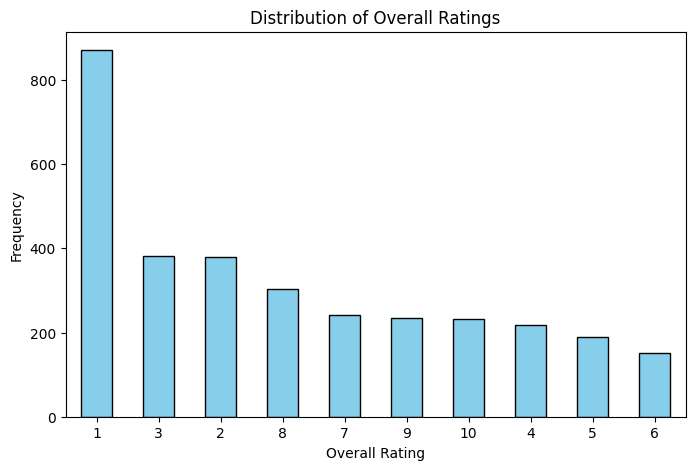

In [26]:
value_counts = data["Overall_Rating"].value_counts()

plt.figure(figsize=(8, 5))
value_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Overall Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

In [27]:

# Group by Overall_Rating and get value counts of Recommended
rating_recommend_all = data.groupby('Overall_Rating')['Recommended'].value_counts()

# Show as pivoted table
print(rating_recommend_all.unstack(fill_value=0))

Recommended      no  yes
Overall_Rating          
1               866    5
2               376    4
3               376    5
4               204   13
5               145   45
6                49  102
7                27  214
8                10  294
9                 1  233
10                2  229


In [28]:
# Define sentiment labels from rating
data['sentiment'] = data['Overall_Rating'].apply(lambda x: 'positive' if x >= 6 else 'negative')

In [29]:
data_lite = data[['Overall_Rating', 'sentiment', 'Recommended']]
data_lite.head()

,Overall_Rating,sentiment,Recommended
0,1,negative,no
1,7,positive,yes
2,9,positive,yes
3,9,positive,yes
4,3,negative,no


In [30]:
# Separate verified and unverified reviews
positive_reviews = data[data['sentiment'] == 'positive']
negative_reviews = data[data['sentiment'] == 'negative']

In [31]:
# Initialize VADER
sid = SentimentIntensityAnalyzer()

# Function to analyze sentiment using VADER and convert to labels
def analyze_sentiment_vader(text):
    score = sid.polarity_scores(text)['compound']
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Function to analyze sentiment using TextBlob and convert to labels
def analyze_sentiment_textblob(text):
    score = TextBlob(text).sentiment.polarity
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis separately for positive and negative reviews
positive_reviews['VADER_Sentiment'] = positive_reviews['Lemma'].apply(analyze_sentiment_vader)
positive_reviews['TextBlob_Sentiment'] = positive_reviews['Lemma'].apply(analyze_sentiment_textblob)

negative_reviews['VADER_Sentiment'] = negative_reviews['Lemma'].apply(analyze_sentiment_vader)
negative_reviews['TextBlob_Sentiment'] = negative_reviews['Lemma'].apply(analyze_sentiment_textblob)

In [32]:
positive_reviews.sample(5)

,Serial_No,Trip_Verified,Feedback,Overall_Rating,Recommended,Cleaned Reviews,Lemma,sentiment,VADER_Sentiment,TextBlob_Sentiment
2680,2681,Not Verified,"Hong Kong to London Heathrow with British Airways. Efficient check in at the Airport Express in-town check In (train service from town to airport). Flight delayed but smooth boarding. Clean cabin, cabin attendants were very helpful and willing to serve. Dinner was decent, with a good cup of English tea afterwards. Cabin was quiet for a good sleep. Entertainment system was OK, choices of films (mainly non-English ones) can be expanded. Cup noodles was offered as mid-flight snack. Breakfast was horrendous. As always very long immigration queues at Heathrow, especially when the flight is delayed with many other long haul flights landing before my flight. Overall good value for money.",8,yes,hong kong london heathrow british airways efficient check airport express town check train service town airport flight delayed smooth boarding clean cabin cabin attendants helpful willing serve dinner decent good cup english tea afterwards cabin quiet good sleep entertainment system ok choices films mainly non english ones expanded cup noodles offered mid flight snack breakfast horrendous always long immigration queues heathrow especially flight delayed many long haul flights landing flight overall good value money,hong kong london heathrow british airways efficient check airport express town check train service town airport flight delay smooth boarding clean cabin cabin attendant helpful willing serve dinner decent good cup english tea cabin quiet good sleep entertainment system ok choice film mainly non english one expand cup noodle offer mid flight snack breakfast horrendous long immigration queue heathrow especially flight delay long haul flight land flight overall good value money,positive,Positive,Positive
1210,1211,Trip Verified,"✅ | \r\nBerlin to Johannesburg via London. The short haul flight between Berlin and London was oKay, they don't include drinks or snacks anymore on short distance flights and prices onboard for them are compared to some low-cost carriers high. Because of an engine problem, the flights from LHR to JNB was delayed by 2:45h. British Airways gave £5 vouchers out to compensate for snacks and drinks. Inside the A380, the IFE boxes under the window seats take a big part of the available leg space.",6,yes,berlin johannesburg via london short haul flight berlin london okay include drinks snacks anymore short distance flights prices onboard compared low cost carriers high engine problem flights lhr jnb delayed h british airways gave vouchers compensate snacks drinks inside ife boxes window seats take big part available leg space,berlin johannesburg london short haul flight berlin london okay include drink snack anymore short distance flight price onboard compare low cost carrier high engine problem flight lhr jnb delay h british airways give voucher compensate snack drink inside ife boxes window seat big available leg space,positive,Negative,Positive
1680,1681,Not Verified,"✅ Verified Review | Los Angeles to Doha via London. Great staff, poor food and stupid cabin layout. I’m spoilt flying gulf airlines, but this time I tried a rear facing “internal” 4 of 345 configuration. Firstly, staring in the face of my two new best friends (seats facing forward) was at best weird, and at worst like a business class speed dating experience. Crew could barely serve me, ventilation was restricted and access 100% blocked by the foot rests of forward facing passengers. Once the security screens went up I felt like I was in some sort of flying crypt and was tempted to assume brace position to give the impression I had died and was on a viewing. The food was embarrassing bad - bigger serves of economy style food in bigger economy style bowls. BA, you have great crew trying to do their best with silly cabin engineering and poor catering support.",6,no,verified review los angeles doha via lo

In [33]:
negative_reviews.sample(5)

,Serial_No,Trip_Verified,Feedback,Overall_Rating,Recommended,Cleaned Reviews,Lemma,sentiment,VADER_Sentiment,TextBlob_Sentiment
2658,2659,Not Verified,"Thanks to a time change from 23.55 to 00.05, which brought forward our departure by almost 24 hours, we very nearly missed our flight back from Rio de Janeiro to London. The check-in desks were crowded out by Team GB athletes returning home from a training session and we were relieved to get the fast track treatment. The first/business lounge at GIG is one of the worst we've been in. Our seats were 1E/F and seemed marginally better than the first class seats on a 747, although still far off the standard of British Airways competitors. 1E/F also suffer from being near the galley and there was one crew member who spent much of the night talking away to her colleagues. 1A and 1K seemed to be occupied by BA employees and there was far too much schmoozing going on. Service on the whole was reasonably good, although none of the food on the menu was actually available. This was rather feebly blamed on the changeover from one month to the next. The IFE worked reliably and the large screen had a much better resolution than on 747s. Overnight the temperature in the cabin was set too high, which resulted in an uncomfortable sleep under the duvet in the pyjamas provided. The toilets on the 777 are ridiculously small and weren't well cleaned during the flight. Breakfast was the usual affair, with an atrociously rubbery omelette. Overall, the flight was okay, but not a first class experience.",5,no,thanks time change brought forward departure almost hours nearly missed flight back rio de janeiro london check desks crowded team gb athletes returning home training session relieved get fast track treatment first business lounge gig one worst seats e f seemed marginally better first class seats although still far standard british airways competitors e f also suffer near galley one crew member spent much night talking away colleagues k seemed occupied ba employees far much schmoozing going service whole reasonably good although none food menu actually available rather feebly blamed changeover one month next ife worked reliably large screen much better resolution overnight temperature cabin set high resulted uncomfortable sleep duvet pyjamas provided toilets ridiculously small well cleaned flight breakfast usual affair atrociously rubbery omelette overall flight okay first class experience,thank time change bring forward departure hour nearly miss flight rio de janeiro london check desk crowded team gb athlete return home training session relieve fast track treatment business lounge gig bad seat e f marginally well class seat far standard british airways competitor e f suffer near galley crew member spend night talk away colleague k occupy ba employee far schmoozing go service reasonably good food menu actually available feebly blame changeover month ife work reliably large screen well resolution overnight temperature cabin set high result uncomfortable sleep duvet pyjama provide toilet ridiculously small clean flight breakfast usual affair atrociously rubbery omelette overall flight okay class experience,negative,Negative,Positive
2058,2059,Not Verified,"✅ Verified Review | My partner and I flew Dublin to Seattle via London Heathrow with British Airways. Heathrow to Seattle was on a B777-200 which was slightly dated and seats were rather cramped, making it impossible to sleep on a 9-10hr flight. Online check-in wasn't possible and we weren't able to select our seats as our booking had an Iberia flight number even though it was operated by BA. Made lengthy phone calls and same response was given that nothing could be done about it until the airport. Arrived early at airport to find plane was overbooked so my partner and I didn't get our seats together - ground staff could do nothing about it. Luckily we were able to swap with another passenger once on board. Food was bland to say the least - possi

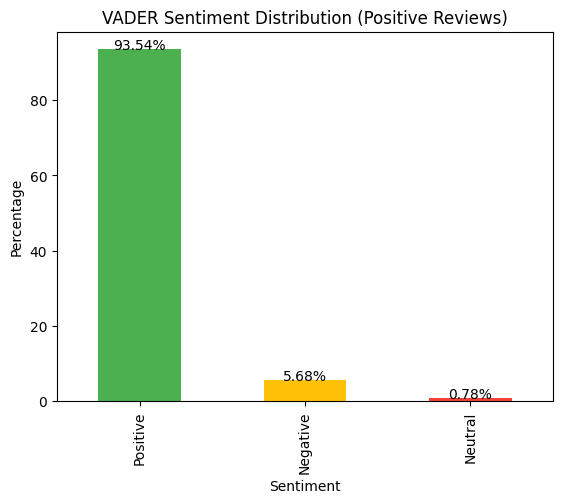

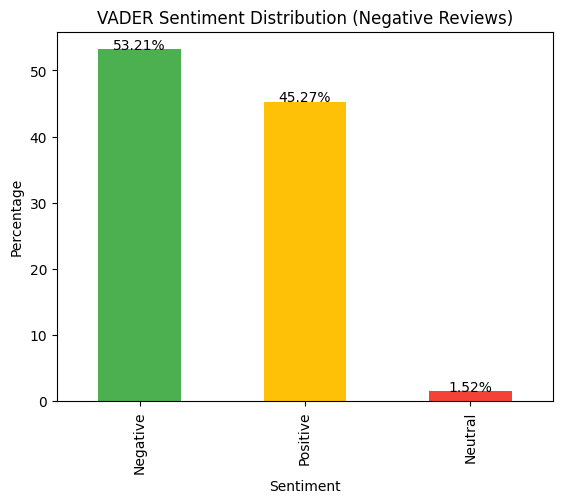

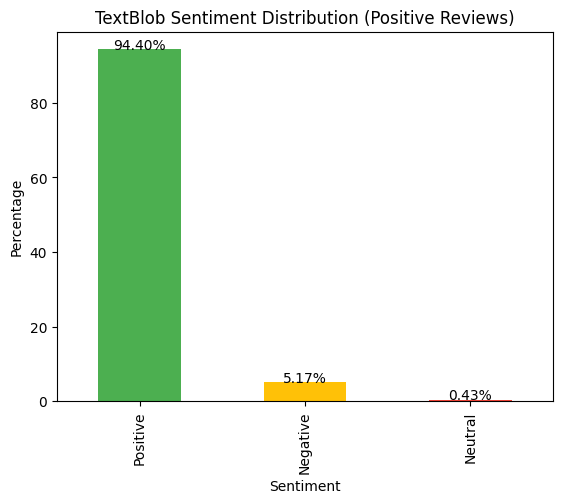

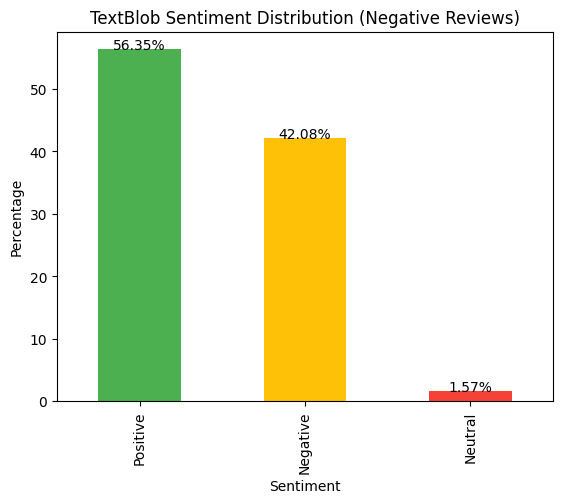

In [34]:
# Visualize the sentiment distribution for VADER with percentage labels

# For Positive Reviews
positive_vader_sentiment_counts = positive_reviews['VADER_Sentiment'].value_counts(normalize=True) * 100
ax = positive_vader_sentiment_counts.plot(kind='bar', color=['#4CAF50', '#FFC107', '#F44336'])
plt.title('VADER Sentiment Distribution (Positive Reviews)')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')
plt.show()

# For Negative Reviews
negative_vader_sentiment_counts = negative_reviews['VADER_Sentiment'].value_counts(normalize=True) * 100
ax = negative_vader_sentiment_counts.plot(kind='bar', color=['#4CAF50', '#FFC107', '#F44336'])
plt.title('VADER Sentiment Distribution (Negative Reviews)')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')
plt.show()

# Visualize the sentiment distribution for TextBlob with percentage labels

# For Positive Reviews
positive_textblob_sentiment_counts = positive_reviews['TextBlob_Sentiment'].value_counts(normalize=True) * 100
ax = positive_textblob_sentiment_counts.plot(kind='bar', color=['#4CAF50', '#FFC107', '#F44336'])
plt.title('TextBlob Sentiment Distribution (Positive Reviews)')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')
plt.show()

# For Negative Reviews
negative_textblob_sentiment_counts = negative_reviews['TextBlob_Sentiment'].value_counts(normalize=True) * 100
ax = negative_textblob_sentiment_counts.plot(kind='bar', color=['#4CAF50', '#FFC107', '#F44336'])
plt.title('TextBlob Sentiment Distribution (Negative Reviews)')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')
plt.show()

### Topic Modeling

In [35]:
import gensim
from gensim import corpora

# Create a dictionary and corpus for LDA
def prepare_lda_data(reviews):
    text_data = [review.split() for review in reviews['Lemma']]
    dictionary = corpora.Dictionary(text_data)
    corpus = [dictionary.doc2bow(text) for text in text_data]
    return dictionary, corpus

# For verified reviews
positive_dict, positive_corpus = prepare_lda_data(positive_reviews)
negative_dict, negative_corpus = prepare_lda_data(negative_reviews)

# Train LDA models
positive_lda_model = gensim.models.ldamodel.LdaModel(corpus=positive_corpus, num_topics=5, id2word=positive_dict, passes=15)
negative_lda_model = gensim.models.ldamodel.LdaModel(corpus=negative_corpus, num_topics=5, id2word=negative_dict, passes=15)

# Print the topics
print('Positive Reviews LDA Model')
print('---------------------')
print(positive_lda_model.print_topics())
print('Negative reviews LDA Model')
print('---------------------')
print(negative_lda_model.print_topics())

Positive Reviews LDA Model
---------------------
[(0, '0.018*"good" + 0.017*"flight" + 0.015*"seat" + 0.011*"crew" + 0.011*"food" + 0.010*"time" + 0.010*"cabin" + 0.009*"service" + 0.009*"lounge" + 0.009*"club"'), (1, '0.023*"flight" + 0.012*"ba" + 0.010*"crew" + 0.007*"delay" + 0.007*"london" + 0.007*"heathrow" + 0.006*"bag" + 0.005*"great" + 0.005*"passenger" + 0.005*"cabin"'), (2, '0.007*"airways" + 0.006*"british" + 0.005*"tampa" + 0.005*"check" + 0.005*"nice" + 0.005*"time" + 0.004*"comfortable" + 0.004*"cabin" + 0.004*"traveller" + 0.003*"thank"'), (3, '0.027*"flight" + 0.019*"good" + 0.016*"ba" + 0.015*"service" + 0.014*"crew" + 0.011*"time" + 0.010*"lounge" + 0.010*"cabin" + 0.010*"food" + 0.010*"seat"'), (4, '0.036*"flight" + 0.025*"seat" + 0.016*"ba" + 0.013*"good" + 0.011*"time" + 0.011*"food" + 0.011*"london" + 0.010*"fly" + 0.010*"british" + 0.010*"airways"')]
Negative reviews LDA Model
---------------------
[(0, '0.029*"flight" + 0.021*"ba" + 0.019*"cabin" + 0.017*"servic

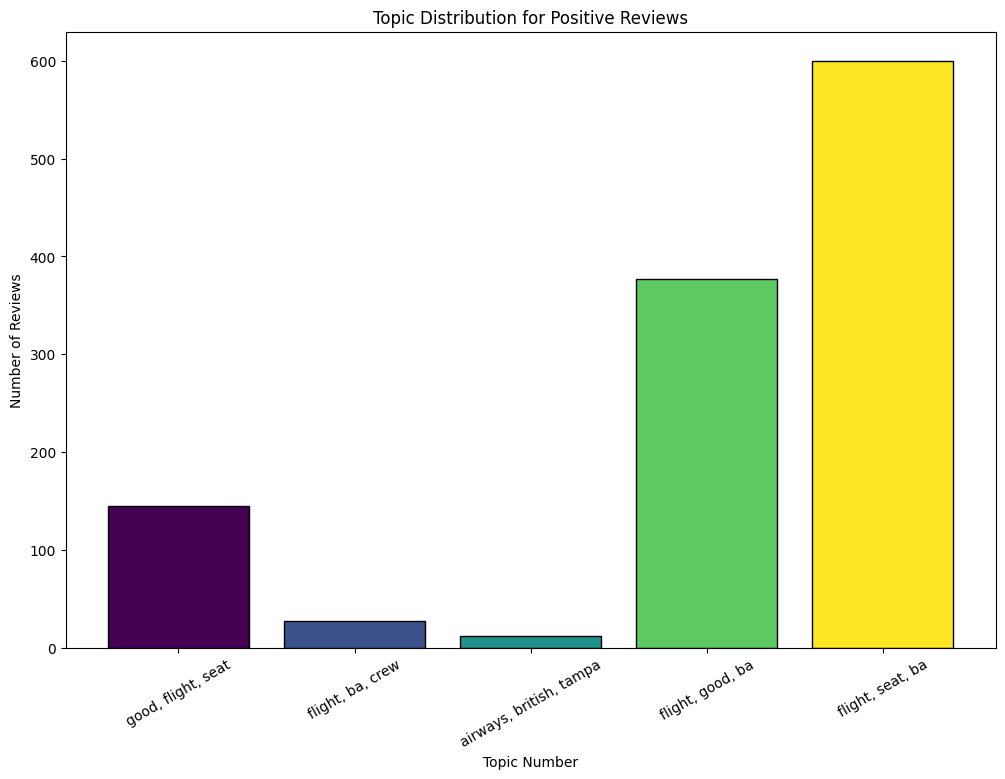

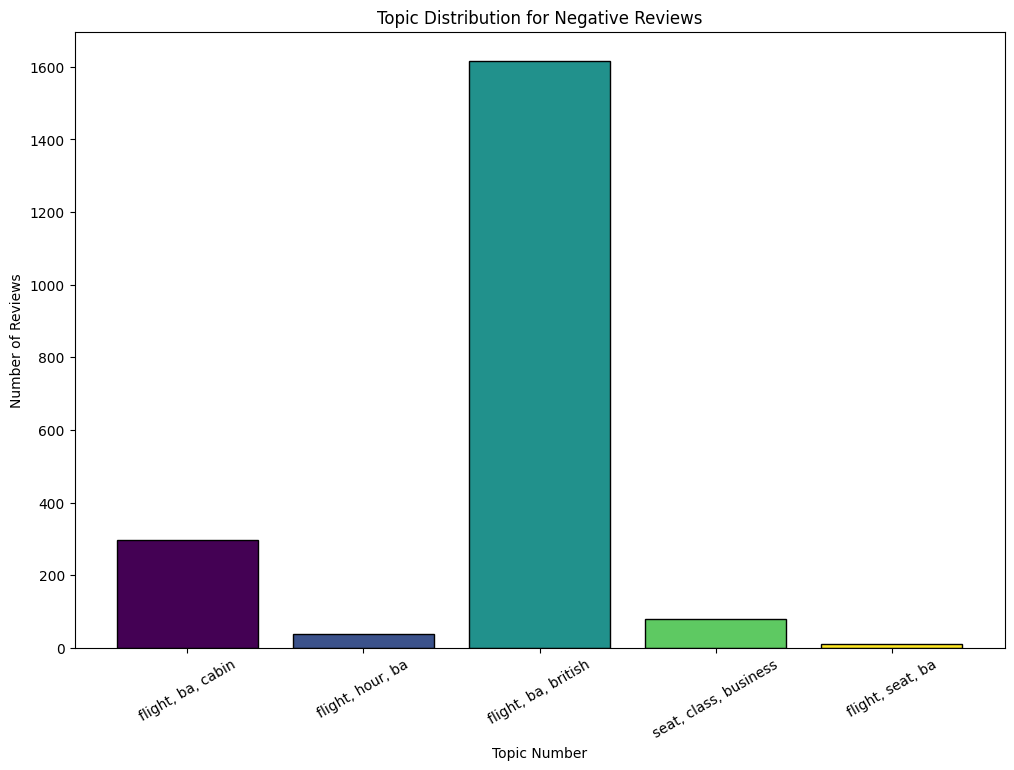

In [36]:
import matplotlib.pyplot as plt
import numpy as np

def plot_topic_distribution_with_labels(lda_model, corpus, title):
    # Get the topic distribution
    topic_distribution = [lda_model.get_document_topics(doc) for doc in corpus]
    topic_counts = [max(topics, key=lambda x: x[1])[0] for topics in topic_distribution]
    
    # Get topic names
    topic_labels = []
    for i in range(lda_model.num_topics):
        words = lda_model.show_topic(i, topn=3)  # Get the top 3 words for each topic
        topic_label = ", ".join([word for word, _ in words])
        topic_labels.append(topic_label)
    
    # Calculate counts for each topic
    unique, counts = np.unique(topic_counts, return_counts=True)
    
    # Colors for the bars
    colors = plt.cm.viridis(np.linspace(0, 1, lda_model.num_topics))
    
    # Plotting
    plt.figure(figsize=(12, 8))
    bars = plt.bar(unique, counts, color=colors, edgecolor='black')
    plt.xlabel('Topic Number')
    plt.ylabel('Number of Reviews')
    plt.title(title)
    
    # Add labels to the bars
    plt.xticks(range(lda_model.num_topics), topic_labels, rotation=30, ha="center")
    
    plt.show()

# For positive reviews
plot_topic_distribution_with_labels(positive_lda_model, positive_corpus, 'Topic Distribution for Positive Reviews')

# For negative reviews
plot_topic_distribution_with_labels(negative_lda_model, negative_corpus, 'Topic Distribution for Negative Reviews')


### Word Cloud

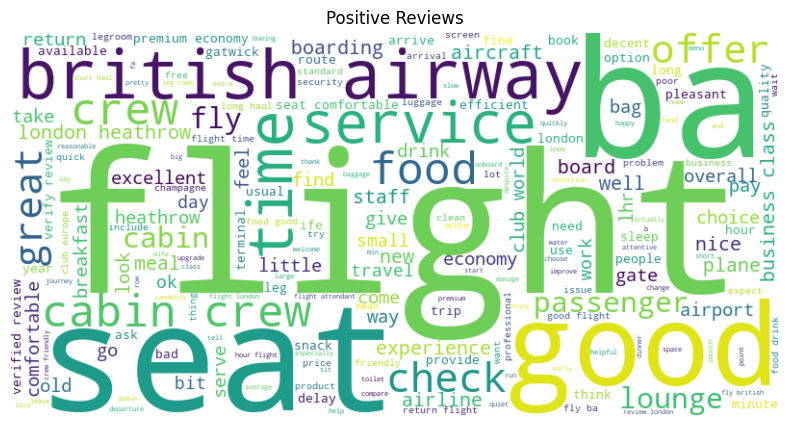

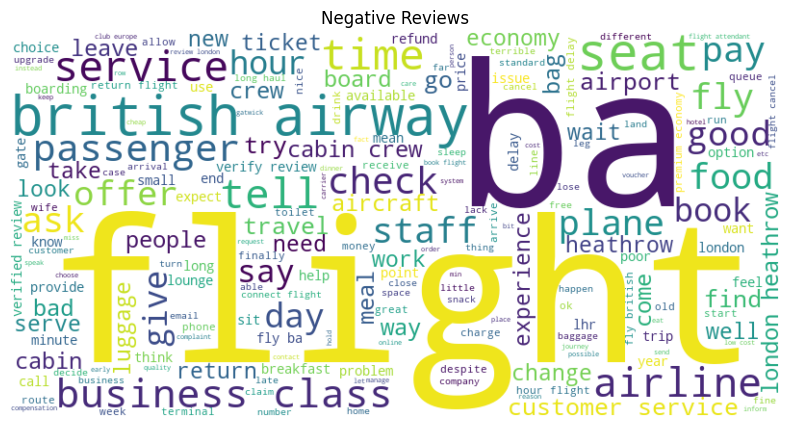

In [37]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word clouds
def generate_wordcloud(text_data, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text_data))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# For positive reviews
generate_wordcloud(positive_reviews['Lemma'], 'Positive Reviews')

# For negative reviews
generate_wordcloud(negative_reviews['Lemma'], 'Negative Reviews')

### PREDICTIVE MODELING

In [38]:
model_df = df

In [39]:
model_df.shape

(3200, 13)

In [40]:
model_df.sample(5)

,Serial_No,Trip_Verified,Feedback,Overall_Rating,Type_of_Traveller,Seat_Type,Seat_Comfort,Cabin_Staff_Service,Ground_Service,Food_and_Beverages,Inflight_Entertainment,Value_For_Money,Recommended
2214,2215,Not Verified,"✅ Verified Review | I booked and bought an online ticket for a multi destination 6 week trip that took me from Bangkok to London, Angola, London, Nigeria, London and back to Bangkok. Before purchase I called the British Airways service number on website and asked if I needed to change rearrange dates with this ticket was that OK - was told 'yes but have to pay a £150 fee', and nothing else a little steep but OK. I further checked extra's would be against the Visa card used to purchase the ticket, 'of course' was the reply. BA make you pay to book a specific seat now. The trip started okay but the aircraft used on the Bangkok flight very worn and old - anyway got through to 3rd leg visiting Nigeria for 12 days business and looked like I could arrange to come home earlier - fired up the BA app on internet roaming service to find its not possible to re-book on the APP as indicated - not given any local number to call - search out possible BA numbers - to find they no longer have an office in Nigeria and get onto what transpires to be their call centre in India. Operator checks there is space on an earlier flight but then announces he has to check the additional cost to come up with an extra of £1000+. I decline this option and explain the £150 as advised (actually APP says change cost is £0). Later BA call centre call back and say they can offer a reduced cost - hustling for business like they are haggling in an open market - however for this option it would not be possible to take payment by Visa. It had to be paid in cash to only a single bank branch in Abuja (during bank open hours) - some 6 hours and 300Km's away. By now I had readjusted to fly on the original dates fuming with BA over the mis sold flight and ridiculous impractical conditions they try and enforce. Taking this up with BA complaints - takes 2 month to elicit a first response - to be dealt with on one sided website. They do not take responsibility for the advice given over the phone, will not acknowledge any shortcomings of their APP refusing to discuss it and failure to advise on their very special conditions that apply to their Nigerian flights. My return flight to Bangkok on a tired sunken seat with bent worn and distorted table closures and scratched video screen topped by the sight of BA cabin staff too short and rotund to be able to reach and close the overhead lockers before take off - and persuading a bemused passenger out his seat to do this for them that this is not the former 'flag carrier' but a worn out and low cost discount carrier. Never again.",1,Business,Economy Class,1.0,1.0,2.0,2.0,1.0,1,no
571,572,Trip Verified,"✅ | Three flights, London to Reykjavik return and Frankfurt to London. Generally the flights were of an acceptable standard, though the seats and legroom are quite tight for a three-hour flight. The cabin crews were efficient and generally friendly. A big plus for BA was informative announcements from the cockpit, often missing on other airlines. Flights operated generally close to the advertised times. But BA was let down by chaotic check-in and boarding procedures. In preparation for each flight the number of check-in staff was one or at most two (in Frankfurt the lone check-in agent was also checking in Business Class passengers). Why are Economy class passengers boarded from the front and not from the back? This was standard across the three flights, but slowed down the boarding process immensely as people seated further back tried to get past forward seated passengers stowing their (enormous) cabin baggage. It would make much more sense to board people at the back first. And to enforce baggage rules so that cabin crew are not wandering up and down the cabin trying to find overhead space for the hapless passengers w

In [41]:
model_df.isnull().sum()

Serial_No                 0
Trip_Verified             0
Feedback                  0
Overall_Rating            0
Type_of_Traveller         0
Seat_Type                 0
Seat_Comfort              0
Cabin_Staff_Service       0
Ground_Service            0
Food_and_Beverages        0
Inflight_Entertainment    0
Value_For_Money           0
Recommended               0
dtype: int64

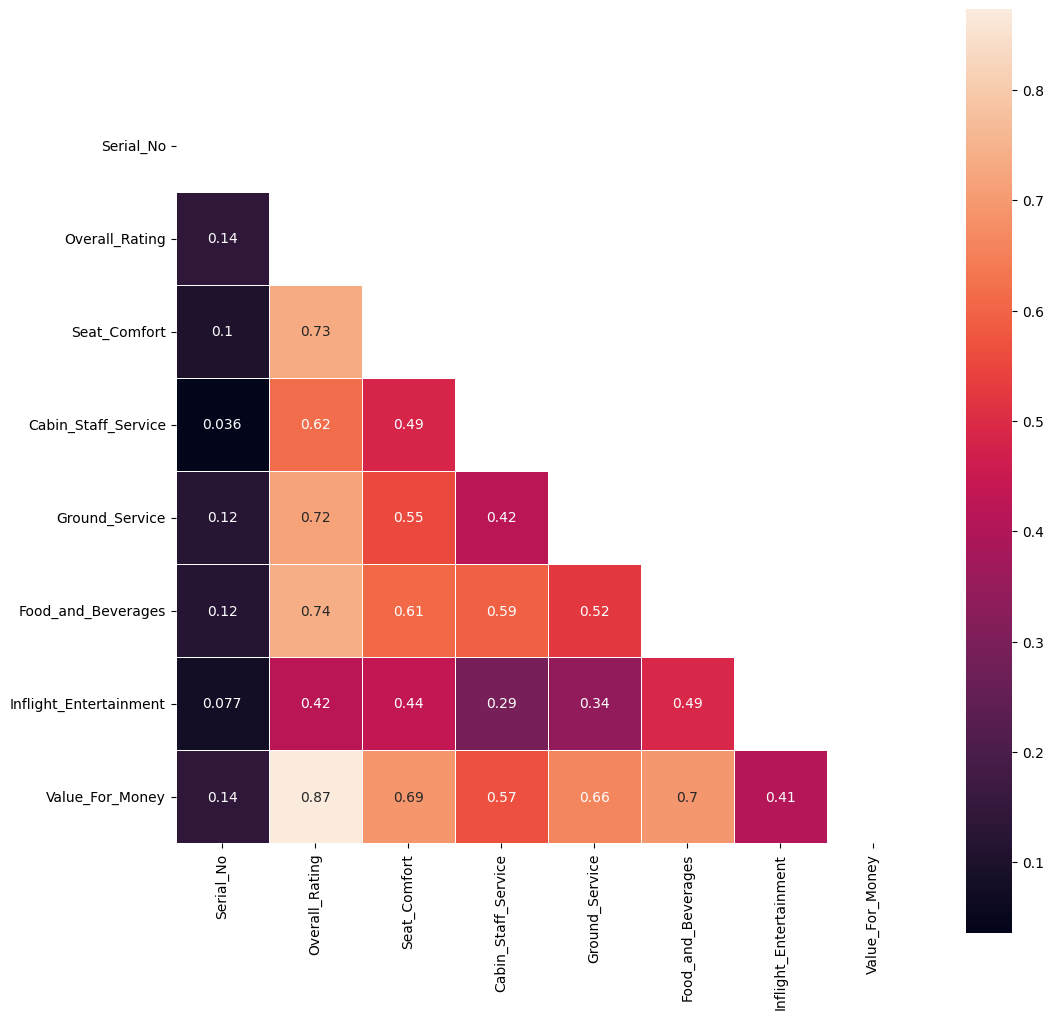

In [42]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(12,12))
mask = np.triu(np.ones_like(model_df.corr(numeric_only=True), dtype=bool))
sns.heatmap(model_df.corr(numeric_only=True), linewidths=0.5, mask=mask, square=True, ax=ax, annot=True);

In [43]:
#Casting target variable as int datatype

model_df['Recommended'] = (model_df['Recommended'] == 'yes').astype(int)

In [44]:
model_df['Recommended'].head()

0    0
1    1
2    1
3    1
4    0
Name: Recommended, dtype: int64

In [45]:
#correlated columns with target

correlation = model_df.corr(numeric_only=True)
correlation['Recommended'].sort_values(ascending=False)

Recommended               1.000000
Overall_Rating            0.863132
Value_For_Money           0.800752
Food_and_Beverages        0.678292
Seat_Comfort              0.646763
Ground_Service            0.616410
Cabin_Staff_Service       0.569877
Inflight_Entertainment    0.370610
Serial_No                 0.111669
Name: Recommended, dtype: float64

In [46]:
'''
We drop Serial_No column due to less relevance.
'''

model_df.drop(['Serial_No'],inplace=True, axis=1)
#drop feedback next time to run

In [47]:
model_df.shape

(3200, 12)

Encoding and Standardization

In [48]:
y = model_df['Recommended']
X = model_df.drop(['Recommended'], axis=1)

In [49]:
X.drop(['Feedback'],inplace=True, axis=1)

In [50]:
cat_cols = X.select_dtypes(include='object')
cat_cols.columns

Index(['Trip_Verified', 'Type_of_Traveller', 'Seat_Type'], dtype='object')

In [51]:
model_df_encoded = pd.get_dummies(X,columns=cat_cols.columns,dtype= 'int')
model_df_encoded.sample(5)

,Overall_Rating,Seat_Comfort,Cabin_Staff_Service,Ground_Service,Food_and_Beverages,Inflight_Entertainment,Value_For_Money,Trip_Verified_Not Verified,Trip_Verified_Trip Verified,Type_of_Traveller_Business,Type_of_Traveller_Couple Leisure,Type_of_Traveller_Family Leisure,Type_of_Traveller_Solo Leisure,Seat_Type_Business Class,Seat_Type_Economy Class,Seat_Type_First Class,Seat_Type_Premium Economy
2818,7,4.0,3.0,4.0,2.0,2.0,4,1,0,1,0,0,0,0,0,0,1
2050,7,2.0,5.0,4.0,4.0,3.0,3,1,0,0,0,0,1,0,1,0,0
1072,10,5.0,5.0,5.0,5.0,5.0,5,0,1,0,0,0,1,0,1,0,0
2119,1,2.0,3.0,4.0,1.0,1.0,3,1,0,0,1,0,0,0,1,0,0
2974,1,1.0,1.0,1.0,1.0,1.0,2,1,0,0,0,0,1,0,1,0,0


In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [53]:
'''
scale, fit and transform data
'''

scaler = StandardScaler()

scaled_df = scaler.fit_transform(model_df_encoded)

In [54]:
scaled_df = pd.DataFrame(scaled_df, columns = model_df_encoded.columns)

In [55]:
scaled_df.head()

,Overall_Rating,Seat_Comfort,Cabin_Staff_Service,Ground_Service,Food_and_Beverages,Inflight_Entertainment,Value_For_Money,Trip_Verified_Not Verified,Trip_Verified_Trip Verified,Type_of_Traveller_Business,Type_of_Traveller_Couple Leisure,Type_of_Traveller_Family Leisure,Type_of_Traveller_Solo Leisure,Seat_Type_Business Class,Seat_Type_Economy Class,Seat_Type_First Class,Seat_Type_Premium Economy
0,-1.083163,-1.242566,-1.486478,-1.147269,-0.963412,-0.750050,-1.053848,-1.190344,1.190344,-0.520432,-0.725251,2.494690,-0.660504,-0.672239,0.922958,-0.236130,-0.325758
1,0.836594,0.942166,1.164249,0.209192,0.426856,1.476444,1.027398,-1.190344,1.190344,-0.520432,-0.725251,-0.400851,1.513995,-0.672239,0.922958,-0.236130,-0.325758
2,1.476513,1.670409,1.164249,1.565653,1.817123,-0.750050,1.027398,-1.190344,1.190344,-0.520432,-0.725251,-0.400851,1.513995,-0.672239,-1.083473,4.234963,-0.325758
3,1.476513,0.942166,1.164249,0.887422,1.121989,0.734279,1.027398,-1.190344,1.190344,-0.520432,1.378832,-0.400851,-0.660504,1.487566,-1.083473,-0.236130,-0.325758
4,-0.443244,1.670409,1.164249,-1.147269,-0.963412,-0.750050,0.333650,-1.190344,1.190344,-0.520432,1.378832,-0.400851,-0.660504,-0.672239,0.922958,-0.236130,-0.325758


Train, Test and Split

In [56]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

In [57]:
X_features = scaled_df.to_numpy()
y_label = y.values.reshape(-1,)

X_train, X_temp, y_train, y_temp = train_test_split(X_features, y_label, stratify = y_label, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, stratify = y_temp, test_size=0.5, random_state=42)
print('Shape of X_train:',X_train.shape)
print('Shape of X_val:',X_val.shape)
print('Shape of X_test:',X_test.shape)

Shape of X_train: (2240, 17)
Shape of X_val: (480, 17)
Shape of X_test: (480, 17)


Custom Plot Function

In [58]:
def plot_classification_metrics(test_y, predicted_y):
    # Confusion matrix
    C = confusion_matrix(test_y, predicted_y)

    # Precision matrix
    A = (C/C.sum(axis=0))
    
    # Recall matrix
    B = (((C.T)/(C.sum(axis=1))).T)
    
    plt.figure(figsize=(20,4))
    
    labels = ['Not Recommended', 'Recommended']
   
    cmap=sns.light_palette("green")
    plt.subplot(1,3,1)
    sns.heatmap(C, annot=True, cmap=cmap,fmt="d", xticklabels = labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title('Confusion matrix')
    
    plt.subplot(1,3,2)
    sns.heatmap(A, annot=True, cmap=cmap, xticklabels = labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title('Precision matrix')
    
    plt.subplot(1,3,3)
    sns.heatmap(B, annot=True, cmap=cmap, xticklabels = labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title('Recall matrix')
    
    plt.show()

RANDOM FOREST

In [59]:
alpha = [200,500,1000,2000]
max_depth = [7, 10]
cv_auc_score = []
for i in alpha:
    for j in max_depth:
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j,class_weight='balanced',
                                     random_state=42, n_jobs=-1)
        clf.fit(X_train, y_train)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(X_train, y_train)
        y_pred_prob = sig_clf.predict_proba(X_val)[:,1]
        cv_auc_score.append(roc_auc_score(y_val,y_pred_prob))
        print('For n_estimators {0}, max_depth {1} cross validation AUC score {2}'.
              format(i,j,roc_auc_score(y_val,y_pred_prob)))

For n_estimators 200, max_depth 7 cross validation AUC score 0.9877208547266687
For n_estimators 200, max_depth 10 cross validation AUC score 0.9871356840833585
For n_estimators 500, max_depth 7 cross validation AUC score 0.9877397311990334
For n_estimators 500, max_depth 10 cross validation AUC score 0.9873622017517365
For n_estimators 1000, max_depth 7 cross validation AUC score 0.9875887194201147
For n_estimators 1000, max_depth 10 cross validation AUC score 0.98756984294775
For n_estimators 2000, max_depth 7 cross validation AUC score 0.9877019782543038
For n_estimators 2000, max_depth 10 cross validation AUC score 0.9877397311990335


In [60]:
best_alpha = np.argmax(cv_auc_score)
print('The optimal values are: n_estimators {0}, max_depth {1} '.format(alpha[int(best_alpha/2)],
                                                                        max_depth[int(best_alpha%2)]))
rf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)],
                            class_weight='balanced', random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
rf_sig_clf = CalibratedClassifierCV(rf, method="sigmoid")
rf_sig_clf.fit(X_train, y_train)
y_pred_prob = rf_sig_clf.predict_proba(X_train)[:,1]
print('For best n_estimators {0} best max_depth {1}, The Train AUC score is {2}'.format(alpha[int(best_alpha/2)],
                                                    max_depth[int(best_alpha%2)],roc_auc_score(y_train,y_pred_prob)))
y_pred_prob = rf_sig_clf.predict_proba(X_val)[:,1]
print('For best n_estimators {0} best max_depth {1}, The Validation AUC score is {2}'.format(alpha[int(best_alpha/2)],
                                                            max_depth[int(best_alpha%2)],roc_auc_score(y_val,y_pred_prob)))
y_pred_prob = rf_sig_clf.predict_proba(X_test)[:,1]
print('For best n_estimators {0} best max_depth {1}, The Test AUC score is {2}'.format(alpha[int(best_alpha/2)],
                                                        max_depth[int(best_alpha%2)],roc_auc_score(y_test,y_pred_prob)))
y_pred = rf_sig_clf.predict(X_test)
print('The test AUC score is :', roc_auc_score(y_test,y_pred_prob))
print('The accuracy score is :', accuracy_score(y_test, y_pred))
print('The percentage of misclassified points {:05.2f}% :'.format((1-accuracy_score(y_test, y_pred))*100))

The optimal values are: n_estimators 2000, max_depth 10 
For best n_estimators 2000 best max_depth 10, The Train AUC score is 0.9990972889169983
For best n_estimators 2000 best max_depth 10, The Validation AUC score is 0.9877397311990335
For best n_estimators 2000 best max_depth 10, The Test AUC score is 0.9902723367209827
The test AUC score is : 0.9902723367209827
The accuracy score is : 0.9416666666666667
The percentage of misclassified points 05.83% :


MODEL EVALUATION

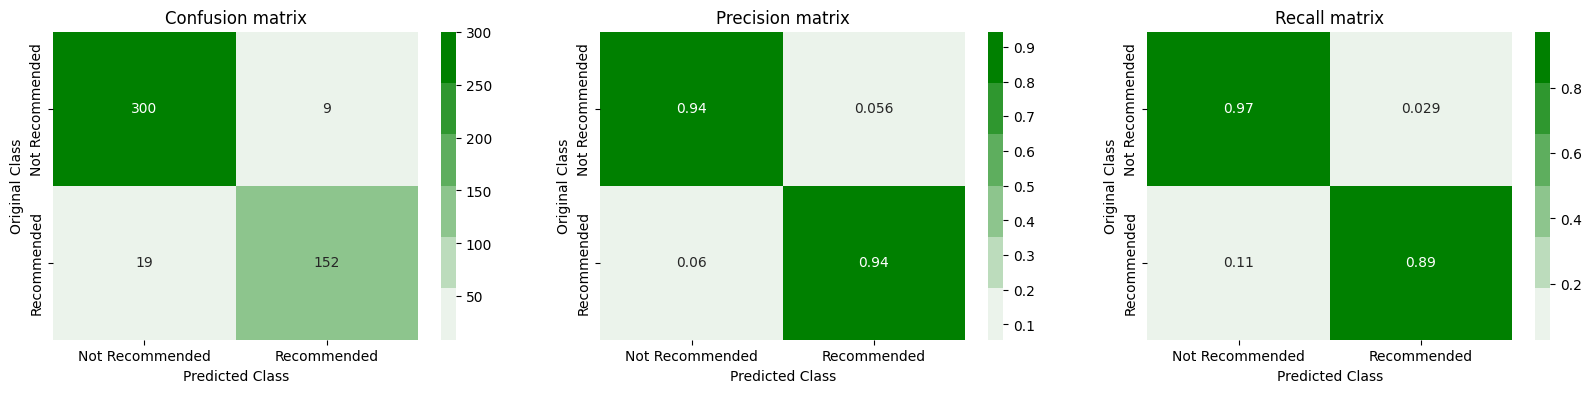

In [61]:
plot_classification_metrics(y_test, y_pred)

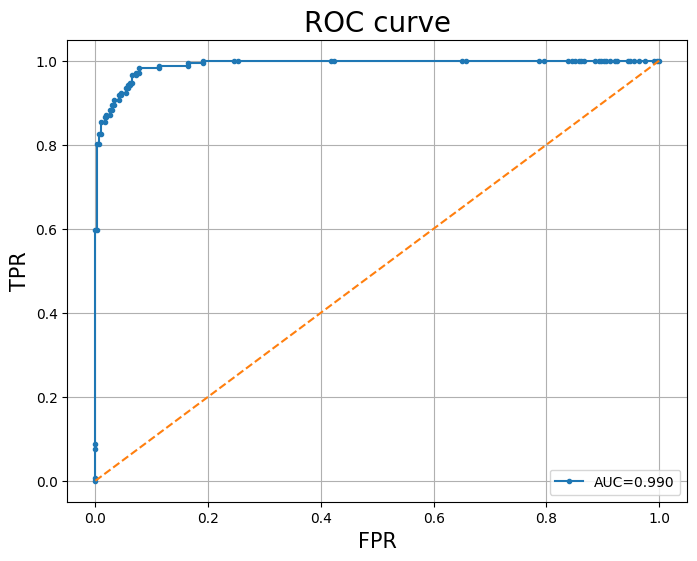

In [62]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test,y_pred_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, marker='.')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC curve', fontsize = 20)
plt.xlabel('FPR', fontsize=15)
plt.ylabel('TPR', fontsize=15)
plt.grid()
plt.legend(["AUC=%.3f"%auc])
plt.show()